In [7]:
# ✅ Cell 1: Imports
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pathlib import Path

In [8]:
# ✅ Cell 2: Load the GEXF graph
PROJECT_ROOT = Path.cwd().parents[0]
GRAPH_PATH = PROJECT_ROOT / "outputs" / "knowledge_graph" / "dialectal_word_graph.gexf"

G = nx.read_gexf(GRAPH_PATH)
print(f"✅ Loaded graph with {len(G.nodes)} nodes and {len(G.edges)} edges.")


✅ Loaded graph with 24807 nodes and 106561 edges.


In [9]:
# ✅ Cell 3: Filter out malformed tokens
def is_valid_token(word):
    return word.isalpha() and len(word) > 1

valid_nodes = [n for n in G.nodes if is_valid_token(n)]
G = G.subgraph(valid_nodes)
print(f"🧹 Cleaned graph: {len(G.nodes)} valid nodes remaining.")


🧹 Cleaned graph: 24807 valid nodes remaining.


In [10]:
# ✅ Cell 4: Filter top-300 per language
def top_nodes_by_language(graph, lang, top_n):
    return [n for n, d in sorted(graph.nodes(data=True), key=lambda x: int(x[1].get("frequency", 0)), reverse=True)
            if d.get("language") == lang][:top_n]

top_turkish = top_nodes_by_language(G, "turkish", 300)
top_kurmanci = top_nodes_by_language(G, "kurmanci", 300)
top_zazaki = top_nodes_by_language(G, "zazaki", 300)

selected_nodes = set(top_turkish + top_kurmanci + top_zazaki)
G = G.subgraph(selected_nodes)
print(f"🎯 Final graph includes {len(G.nodes)} nodes and {len(G.edges)} edges (300 per language)")


🎯 Final graph includes 900 nodes and 7709 edges (300 per language)


In [11]:
# ✅ Cell 5: Visual attributes
color_map = {"turkish": "red", "kurmanci": "green", "zazaki": "blue"}
node_colors = [color_map.get(G.nodes[n].get("language", "unknown"), "gray") for n in G.nodes]
node_sizes = [int(G.nodes[n].get("frequency", 1)) * 2 for n in G.nodes]


{'xwe': Text(-0.19728613230479158, -0.23284852468254744, 'xwe'),
 'tr': Text(-0.3356783226670362, 0.3274805457472321, 'tr'),
 'de': Text(-0.13041346288280314, -0.30536417776263314, 'de'),
 'daha': Text(-0.3187601528639229, 0.3534163525732431, 'daha'),
 'sonra': Text(-0.3509292794120237, 0.3885190138975172, 'sonra'),
 'kadar': Text(-0.29797643458707396, 0.341523222587383, 'kadar'),
 'değil': Text(-0.24330228954048788, 0.3602267450950026, 'değil'),
 'twenties': Text(-0.3579123432332292, 0.3160838352906391, 'twenties'),
 'iki': Text(-0.27687696677037005, 0.45213876496327815, 'iki'),
 'fakat': Text(-0.32031110293358106, 0.43685190599772283, 'fakat'),
 'onu': Text(-0.32805355063353014, 0.41979476031929475, 'onu'),
 'bunu': Text(-0.22269584626361194, 0.47175450775293504, 'bunu'),
 'her': Text(0.02180538524759481, 0.30066045075301373, 'her'),
 'bana': Text(-0.29496073610805884, 0.37941964821824115, 'bana'),
 'beni': Text(-0.4700450684012895, 0.33894925924333486, 'beni'),
 'iyi': Text(-0.24358

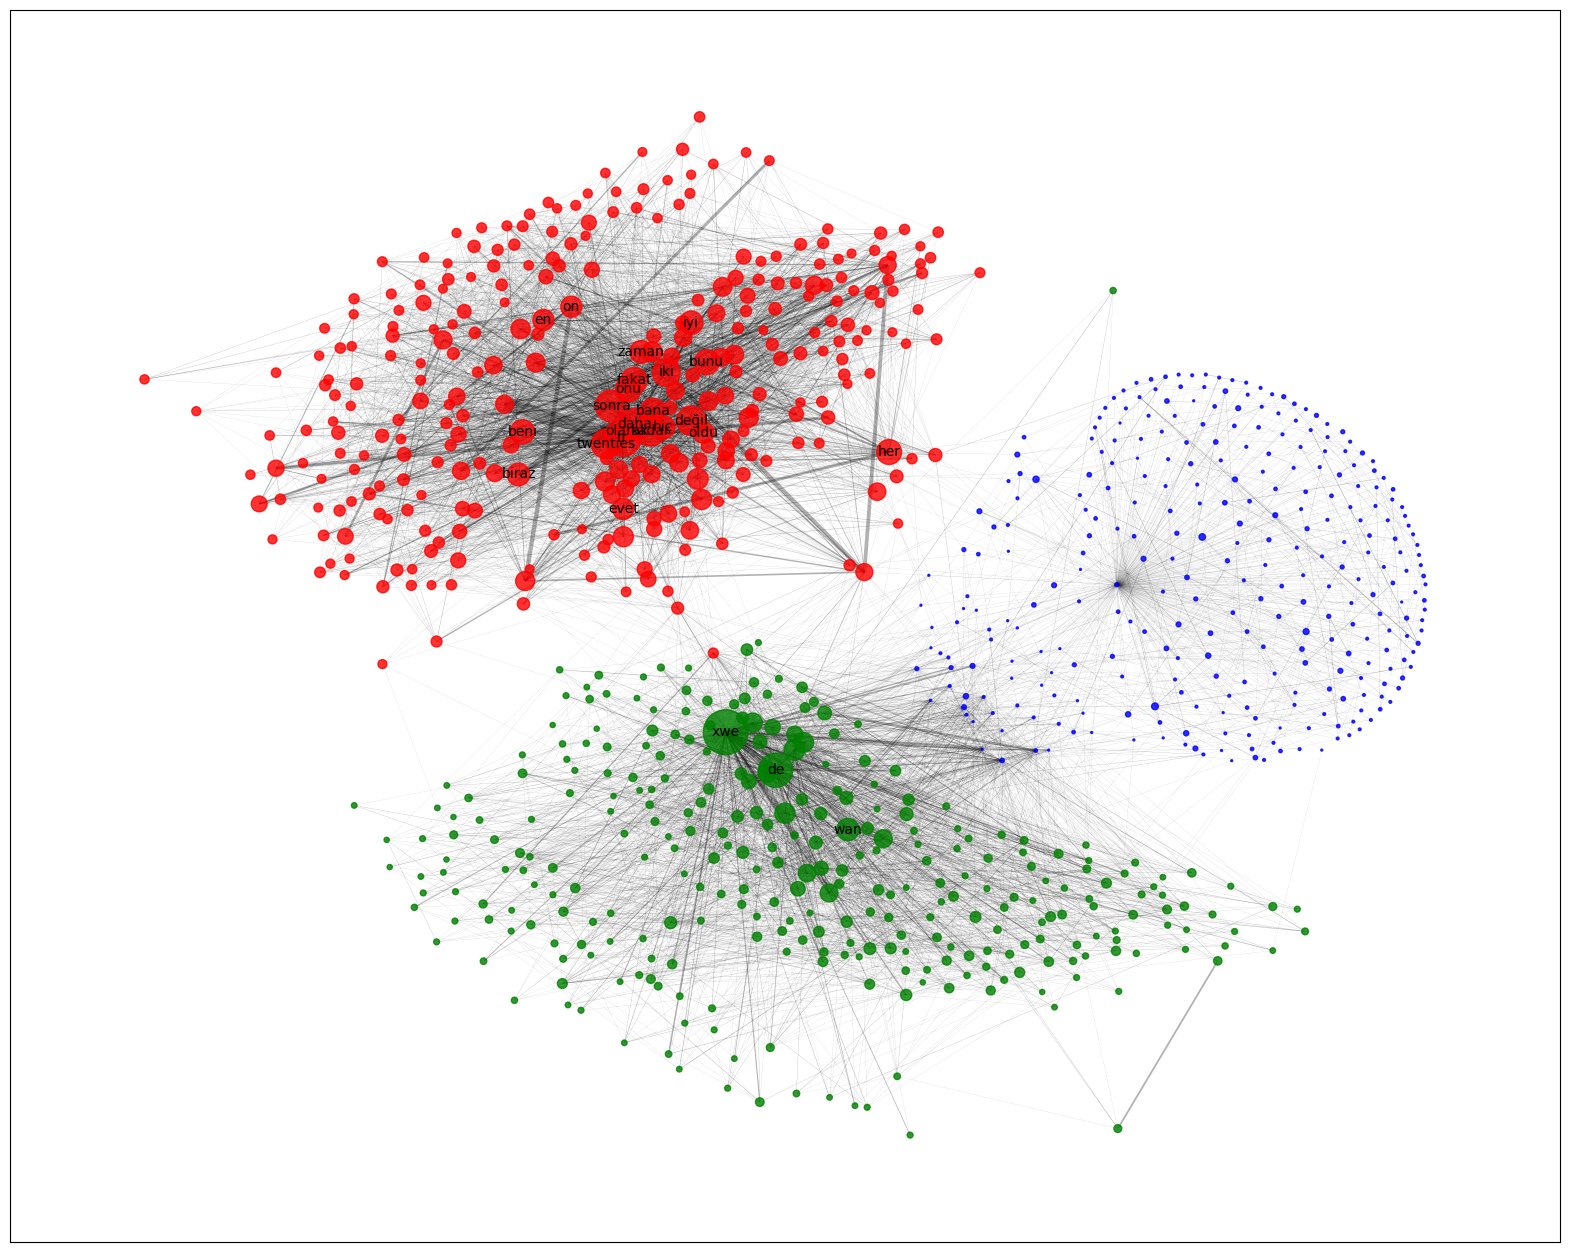

In [12]:
# ✅ Cell 6: Draw with kamada_kawai_layout
plt.figure(figsize=(20, 16))
pos = nx.kamada_kawai_layout(G)

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=[G[u][v].get("weight", 1) * 0.1 for u, v in G.edges()], alpha=0.3)

# Label top-25 frequent nodes
frequent_nodes = sorted(G.nodes(data=True), key=lambda x: int(x[1].get("frequency", 0)), reverse=True)[:25]
nx.draw_networkx_labels(G, pos, labels={n[0]: n[0] for n in frequent_nodes}, font_size=10)


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

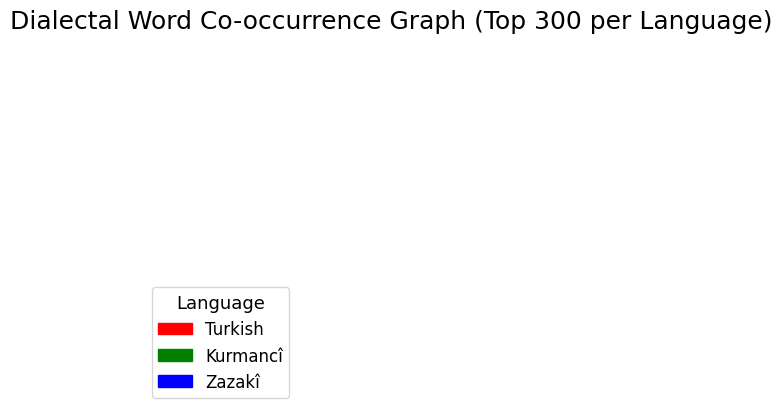

In [13]:
# ✅ Cell 7: Legend + Title
legend_elements = [
    Patch(facecolor="red", edgecolor="red", label="Turkish"),
    Patch(facecolor="green", edgecolor="green", label="Kurmancî"),
    Patch(facecolor="blue", edgecolor="blue", label="Zazakî")
]
plt.legend(handles=legend_elements, loc="lower left", fontsize=12, title="Language", title_fontsize=13)

plt.title("Dialectal Word Co-occurrence Graph (Top 300 per Language)", fontsize=18)
plt.axis("off")

In [14]:
# ✅ Cell 8: Save before showing
output_path = PROJECT_ROOT / "outputs" / "visualizations" / "dialectal_word_graph_top900.png"
plt.savefig(output_path, dpi=300)
print(f"📸 Saved graph visualization to:\n{output_path}")

plt.tight_layout()
plt.show()

📸 Saved graph visualization to:
c:\Users\berfi\Documents\GitHub\dialectalwordmining\outputs\visualizations\dialectal_word_graph_top900.png


<Figure size 640x480 with 0 Axes>